- By Renzo Tanaka-Wong
- December 8th, 2020

I aﬀirm that I personally wrote the text, code, and comments in this homework assignment.

# Homework 8

# Problem 0

This week is the right time for you to be working together with your group to assemble your final project submission. You should have many of the required pieces by now, so your main tasks are to coordinate and agree on how to arrange and present the various required components. There will be no more project time during Discussion sections. 

# Problem 1

Recall the simple random walk.  At each step, we flip a fair coin. If heads, we move "foward" one unit; if tails, we move "backward." 

## Part A

Way back in Homework 1, you wrote some code to simulate a random walk in Python. 

Start with this code, or use posted solutions for HW1. If you have since written random walk code that you prefer, you can use this instead. Regardless, take your code, modify it, and enclose it in a function `rw()`. This function should accept a single argument `n`, the length of the walk. The output should be a list giving the position of the random walker, starting with the position after the first step. For example, 

```python
rw(5)
[1, 2, 3, 2, 3]
```

Unlike in the HW1 problem, you should not use upper or lower bounds. The walk should always run for as long as the user-specified number of steps `n`. 

Use your function to print out the positions of a random walk of length `n = 10`. 

Don't forget a helpful docstring! 

In [1]:
# Import random
import random

def rw(n):
    """
    This function returns a list of positions
    of a random walk simulation specified for:
    n = length of walk
    """
    # List to fill with positions of each step of random walk
    # Starting position is 0
    positions = []
    p = 0
    
    # Iterate over specified length of walk
    for i in range(n):
        # Randomly compute 1 or -1, adjust position, and append to list
        x = random.choice([-1, 1])
        p += x
        positions.append(p)
        
    return positions

# n = 10 demonstration 
rw(10)

[-1, -2, -1, 0, 1, 0, 1, 0, -1, -2]

## Part B

Now create a function called `rw2(n)`, where the argument `n` means the same thing that it did in Part A. Do so using `numpy` tools. Demonstrate your function as above, by creating a random walk of length 10. You can (and should) return your walk as a `numpy` array. 

**Requirements**: 

- No for-loops. 
- This function is simple enough to be implemented as a one-liner of fewer than 80 characters, using lambda notation. Even if you choose not to use lambda notation, the body of your function definition should be no more than three lines long. Importing `numpy` does not count as a line. 
- A docstring is required if and only if you take more than one line to define the function. 

**Hints**:

- Check the documentation for `np.random.choice()`. 
- Discussion 12. 

In [2]:
# Import numpy
import numpy as np
# Random walk with numpy
rw2 = lambda n : np.cumsum(np.random.choice([-1,1], n))
# n = 10 demonstration
rw2(10)

array([-1, -2, -1, -2, -3, -4, -3, -4, -3, -4])

## Part C

Use the `%timeit` magic macro to compare the runtime of `rw()` and `rw2()`. Test how each function does in computing a random walk of length `n = 10000`. 

In [3]:
# time rw()
%timeit rw(10000)

5.21 ms ± 74.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
# time rw2()
%timeit rw2(10000)

87.1 µs ± 1.26 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Part D

Write a few sentences in which you comment on (a) the performance of each function and (b) the ease of writing and reading each function. 

### \[It appears that rw() performed much slower than rw2(); the difference is miliseconds of computation time versus microseconds. However, it was easier writing rw() compared to rw2() because I find the for-loop method to be much more intuitive. For rw2() I have to think about how I could manipulate arrays to mimic the for-loop concept without actually using loops.\]

# Part E

In this problem, we will perform a `d`-dimensional random walk. There are many ways to define such a walk. Here's the definition we'll use for this problem: 

> At each timestep, the walker takes one random step forward or backward **in each of `d` directions.** 

For example, in a two-dimensional walk on a grid, in each timestep the walker would take a step either north or south, and then another step either east or west. Another way to think about is as the walker taking a single "diagonal" step either northeast, southeast, southwest, or northwest. 

Write a function called `rw_d(n,d)` that implements a `d`-dimensional random walk. `n` is again the number of steps that the walker should take, and `d` is the dimension of the walk. The output should be given as a `numpy` array of shape `(n,d)`, where the `k`th row of the array specifies the position of the walker after `k` steps. For example: 

```python
P = rw_d(5, 3)
P
```
```
array([[-1, -1, -1],
       [ 0, -2, -2],
       [-1, -3, -3],
       [-2, -2, -2],
       [-1, -3, -1]])
```

In this example, the third row `P[2,:] = [-1, -3, -3]` gives the position of the walk after 3 steps. 

Demonstrate your function by generating a 3d walk with 5 steps, as shown in the example above. 

All the same requirements and hints from Part B apply in this problem as well. It should be possible to solve this problem by making only a few small modifications to your solution from Part B. If you are finding that this is not possible, you may want to either (a) read the documentation for the relevant `numpy` functions more closely or (b) reconsider your Part B approach. 

In [5]:
# Random d-dimensional walk with numpy
rw_d = lambda n, d : np.cumsum(np.random.choice([-1,1], n*d).reshape(n,d), axis = 0)
# 3d walk with 5 steps demonstration
rw_d(5,3)

array([[-1,  1,  1],
       [-2,  0,  2],
       [-3,  1,  3],
       [-2,  2,  2],
       [-1,  1,  1]])

## Part F

In a few sentences, describe how you would have solved Part E without `numpy` tools. Take a guess as to how many lines it would have taken you to define the appropriate function. Based on your findings in Parts C and D, how would you expect its performance to compare to your `numpy`-based function from Part E? Which approach would your recommend? 

Note: while I obviously prefer the `numpy` approach, it is reasonable and valid to prefer the "vanilla" way instead. Either way, you should be ready to justify your preference on the basis of writeability, readability, and performance. 

**Part E could also be solved without using `numpy` tools and methods. Instead the function could be written using  for-loops and lists to ultimately create a list of lists. The basic idea is that each column from the array in part E would be represented as the cumulative sums of the n-elements of each of d-lists. To produce random positional values (i.e 1 or -1) I would use `random.choice([-1, 1])` as in part A. Iterating over the n elements I would create d lists of random positional values and continue to append cumulative values in the lists until there are n elements in total. This approach would likely take anywhere from 20-30 lines of code as I would have to write nested for-loops for initaializing the lists, producing the random values, and concatinating their cumulative values to the lists. The performance would be notably slower as we know that for-loops have longer run times than numpy methods. Creating nested for loops would significantly increase the run time as well. Therefore, while it would be possible to recreate part E, using the numpy method is preferred.**

## Part G

Generate a 2-dimensional random walk of length 20000. Think of the first column of the output as defining a horizontal coordinate, and the second column as defining a vertical coordinate. Plot the two dimensions on horizontal and vertical axes. You should be able to create some blob-like structures with intriguing shapes. 

You may be interested in looking at several other visualizations of multidimensional random walks [on Wikipedia](https://en.wikipedia.org/wiki/Random_walk). Your result in this part will not look exactly the same, but should look qualitatively fairly similar. 

You only need to show one plot. If you like, you might enjoy playing around with the plot settings. While `ax.plot()` is the normal method to use here, `ax.scatter()` with partially transparent points can also produce some intriguing images. 

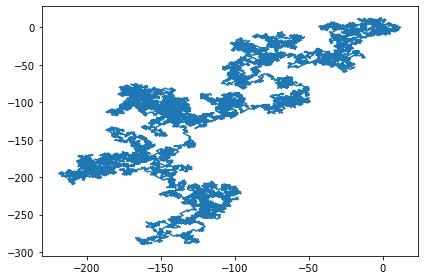

In [6]:
# Import pyplot
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1)
# Set x and y axes
x_ax = rw_d(20000,2)[:,0]
y_ax = rw_d(20000,2)[:,1]
# Plot the random walk
ax.plot(x_ax, y_ax)
fig.tight_layout()

# NLP Problem

In this problem, you will study the sentiment in a data set of tweets collected during the COVID-19 pandemic. To load the data set, run this block: 

In [7]:
import pandas as pd

def grab_tweets():
    """
    The user supplied these data already split into training and test sets. 
    This function downloads and combines them, returning a single data frame.
    No arguments. 
    """

    url1 = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/Corona_NLP_train.csv"
    url2 = "https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/datasets/Corona_NLP_test.csv"
    
    df1 = pd.read_csv(url1, encoding='iso-8859-1')
    df2 = pd.read_csv(url2, encoding='iso-8859-1')
    
    return pd.concat((df1, df2), axis = 0).reset_index().drop("index", axis = 1)

df = grab_tweets()

Perform a sentiment analysis of this data set. 

Many decisions are up to you. What machine learning method will you choose? How will you treat the `Sentiment` column and turn it into a target variable? Feel free to talk on Campuswire about various possibilities. You are welcome to ask me as well; however, I am likely to respond to questions like "Should I do X?" with answers like "Did you try it? What alternatives did you consider?"

For full credit, you should do the following:  

1. Explore the data set a bit. Figure out what each column means and develop a strategy for how you will use or not use it. Show your steps. 
1. Show that your model can make predictions of sentiment on unseen tweets.
2. Show that your model can produce reasonable-looking lists of strong positive and strongly negative words. 
3. Display three tweets in which your model made a mistake -- e.g. it classified the tweet as positive when in fact it was negative, or vice-versa. 
4. Include liberal comments and surrounding text to explain your steps. If you define any functions, you must also include helpful docstrings. 
5. Most instances of for-loops will be docked a few points. There may be exceptions, but I can't think of any at the moment. Try to do the entire problem with no for-loops at all. 

OPTIONALLY, you may choose to look into the text classification tools in the `nltk` package. In this course, we have mostly treated `nltk` as a convenience tool for accessing certain data sets. However, `nltk` also implements its own versions of a number of highly useful functions for text analysis, including sentiment analysis. Section 1.3 of [this chapter](https://www.nltk.org/book/ch06.html) of the `nltk` manual can help you get started. Using `nltk` for this problem might help you get some better results and learn some nifty tricks, but is not at all required. 

#### Your Solution

# Sentiment Analysis of COVID-19 Tweets

In the following code below I will be performing a sentiment analysis on a data set of tweets collected during the COVID-19 pandemic. Here I try to go in-depth with understanding NLP, Sentiment Analysis, and modeling.

## Preparing the data

We have already dowonloaded the data so first let's inspect the data we are working with.

In [8]:
# Insepct the data
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [9]:
df.shape

(44955, 6)

**Description of data**
- "UserName"      : Unique id number for each twitter username
- "ScreenName"    : Unique id number for each twitter screenname
- "Location"      : Location (Categorical Variable)
- "TweetAt"       : Date (Categorical Variable)
- "OriginalTweet" : Actual tweet (Text Data)
- "Sentiment" : Sentiment of tweet (Categorical Data)


From the information above we can see that we are working with a fairly large dataset with 44,955 tweets and 6 variables. Now we will check the datatypes of each column and also check to see if there are any null values present. We also want to begin to explore the columns which are of interest to sentiment analysis.

In [10]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [11]:
# Check to see unique ids
len(set(df.UserName)), len(set(df.ScreenName))

(44955, 44955)

We see that the only columns with null values present is the `Location` column. Furthermore, the ID columns all have unique ID's meaning every tweet is from a different user. These features do not affect our analysis since we require only the sentiment and text fields for sentiment analysis. Accordingly, we discard the rest of the data. Let's also extract the unique values of `Sentiment` to get an idea what our target variables look like. 

In [12]:
# Remove unnecessary columns from data set
df = df[['OriginalTweet', 'Sentiment']]
# Unique sentiments
set(df.Sentiment)

{'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'}

Now we are left with just the original tweets and their sentiments and we seek to create a `term-document matirx`, which is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 

Note: When the argument `stop_words` of `CountVectorizer` is set to 'english' a built-in stop word list for English is used. `min_df` specifes the minimum frequency threshold for which words with frequencies below it are ignored. This allows us to filter out words and strings of characters that are not used very frequently when building our vocabulary.

In [13]:
# Import Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Create an instance of a CountVectorizer
vec = CountVectorizer(min_df = 30, stop_words = 'english')
# Convert counts into a matrix
counts = vec.fit_transform(df["OriginalTweet"])
# Convert to dataframe 
count_df = pd.DataFrame(counts.toarray(), columns = vec.get_feature_names())
# Concatenate the two dataframes
df = pd.concat((df, count_df), axis = 1)

In [14]:
df.shape

(44955, 3270)

We now have a term-doument matrix attached to our original dataframe. Each row contains a tweet, sentiment, and a count of the specific words that are in that tweet. We are now ready to create and train a model.

## Building a model

Our first step before modeling our data is to encode the sentiments with numeric values. We do this because machine learning models do not understand text. 

The steps we take below are crucial because they will have significant implications on our successive modeling. We seek to simplify the sentiments to make this a binary classification problem. We group `Extremely Positive` tweets and `Positive` tweets together since they are both positive, and we group `Extremely Negative` and `Negative` tweets together since they are both negative. We also remove neutral tweets from the data to disregard them as they are out of our binary classification scope; we are interested in positive vs negative tweets.

In [15]:
# Remove Neutral tweets
df = df[df['Sentiment']  != 'Neutral']
# Dictionary for encoding sentiments
sentiment_map = {'Positive'           : 1,
                 'Extremely Positive' : 1,
                 'Negative'           : 0,
                 'Extremely Negative' : 0}
# Encode sentiments according to map
df['Sentiment'] = df['Sentiment'].apply(lambda x : sentiment_map[x])

Our goal is to build a model which predicts the sentiments of a tweet based on the words in the tweet. Now that the data is selected and cleaned, we split it into training and testing data at the proportion 70 : 30. We split the data accordingly in order to have a set of the data which will be used to train our  model and test data which will be used to determine the accuracy of our model and deem necessary adjustments to our model’s parameters.

In [16]:
# Import train test split
from sklearn.model_selection import train_test_split
# Split data into train and test set
train, test = train_test_split(df, test_size = 0.3)
# Split train set into predictors and target
X_train = train.drop(['OriginalTweet', 'Sentiment'], axis = 1 )
y_train = train['Sentiment']
# Split train set into predictors and target
X_test = test.drop(['OriginalTweet', 'Sentiment'], axis = 1 )
y_test =  test['Sentiment']

We will build a Logistic Regression model from the  `sklearn.linear_model` module. Logistic regression is a machine learning classification algorithm that is used to predict the probability of a categorical dependent variable, which in our case is the sentiment of a tweet. We are interested in finding the optimal value for the parameter C, the inverse regularization parameter, that will give us the best score on our test data. We begin by inspecting a model with a default C value.

In [17]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# Adjust max_iter to iterate over all rows of data
LR = LogisticRegression(max_iter = 40000)
# Fit LR model to train set
# Compute model's scores on train and test set
LR.fit(X_train, y_train)
LR.score(X_train, y_train), LR.score(X_test, y_test)

(0.9057185208300828, 0.8520979339219077)

The score on both the training and testing set are fairly strong, however, the test score is approximately 60 basepoints lower which can be a sign of overfitting. In order to find an optimal c-value, we will implement a simple cross-validation method over a range of c-values.

In [18]:
# Import CV score
from sklearn.model_selection import cross_val_score
# Iterate over a range of C values
for C in np.linspace(0.1, 1, 10):
    print(str(np.round(C, 4)), end = ": ")
    LR = LogisticRegression(C = C, max_iter = 40000)
    cv_score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
    print(np.round(cv_score, 3))

0.1: 0.835
0.2: 0.841
0.3: 0.844
0.4: 0.845
0.5: 0.846
0.6: 0.846
0.7: 0.847
0.8: 0.848
0.9: 0.847
1.0: 0.846


From above we observe that the cross validation score is roughly maxmized at a c-value of 0.5. Based on this value we train a linear logistic regression model.

In [19]:
LR = LogisticRegression(C = 0.5, max_iter = 40000)
# Fit LR model to train set
# Compute model's scores on train and test set
LR.fit(X_train, y_train)
LR.score(X_train, y_train), LR.score(X_test, y_test)

(0.9003354657512872, 0.8500045508328024)

This time we acheive a more desirable outcome with the model performing slighlty lower on the training data but  better on the test data than before. From this model we can start to explore the actual behavior of our model and how it gave different weights to specific words. 

## Evaluating results

First we would like to see if our model can produce lists of strongly positive and negative words. We do this by creating a dataframe with rows associating words and their corresponding coefficient values. By sorting and subsetting this dataframe we can create lists of the top postitive and negative words.

In [20]:
# Dataframe of coefficients and words
result_df = pd.DataFrame({"coef" : LR.coef_[0], "word" : X_train.columns})
# List of negative words
list(result_df.sort_values('coef', ascending = True).head(10).word)

['crisis',
 'scams',
 'forced',
 'kill',
 'died',
 'war',
 'hell',
 'crude',
 'shit',
 'worst']

In [21]:
# List of positive words
list(result_df.sort_values('coef', ascending = False).head(10).word)

['best',
 'love',
 'free',
 'great',
 'hand',
 'friend',
 'thanks',
 'positive',
 'won',
 'confidence']

These results seem to be intuitively accurate - negative words are mostly pessemistic and the positive words are affirmative. Next let's evaluate some of the mistakes of the model.

Evaluating the mistakes of a model is an important process of machine learning, as we should always seek to understand why the mistakes happend and try to improve on them in the future.  To visualize our mistakes, we will use a powerful tool from `sklearn.metrics` called `consufion_matrix`. `consufion_matrix` will visualize the predictions against the truth data in a matrix. Inside the matrix, the ( i , j )-th entry gives the number of times that the model predictes data as "i" when it should be "j".

In [36]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix

#set up confusion model
y_test_pred = LR.predict(X_test)
c1 = confusion_matrix(y_test, y_test_pred)
print(c1)

# find the mistakes, 
# and choose some right example to compare
mistakes = X_test[y_test != y_test_pred]
# True sentiments
mistake_labels = y_test[y_test != y_test_pred]
# Predicted sentiments
mistake_preds = y_test_pred[y_test != y_test_pred]

print("")
print("Mistakes: " + str(len(mistakes)))
print("")

[[4270  772]
 [ 847 5098]]

Mistakes: 1619



Our model made 1661 mistakes. To understand some of these mistakes better, let's inspect three instances where the model made a mistake.

In [37]:
# Based on how sentiments were coded above
pos_fal_dict = {1:'Positive', 0:'Negative'}

# Use for loop to show the mistakes table
for i in range(len(mistakes[0:3])):
    print(i+1)
    print("Prediction: " + str(pos_fal_dict[mistake_preds[i]])) 
    print("True: " + str(pos_fal_dict[mistake_labels.values[i]]))
    print("Tweet: " + str(mistakes[:3].index[i]))
    print("Original Tweet: " + str(df.loc[mistakes[:3].index[i]].OriginalTweet))
    print("--------------------------")
    print("")

1
Prediction: Positive
True: Negative
Tweet: 8429

Covid-19 destroyed my reasonable eating habits because the there are few healthy products in the grocery store/"whole foods" left. Today I ate a full box of Annie's mac and cheese, two mini cakes in jar. Buttermilk biscuits for breakfast. I never eat this stuff
--------------------------

2
Prediction: Negative
True: Positive
Tweet: 4639
Original Tweet: .@dougducey thanked @katiehobbs for a successful #Democratic primary, plus emergency and grocery store workers, during #coronavirus spread. He says give blood, give blood, #GiveBlood. @KTAR923 https://t.co/OCUp2woSTP
--------------------------

3
Prediction: Negative
True: Positive
Tweet: 14570


#StopHoarding doesn't just apply to food &amp; loo roll: it applies to housing, wealth &amp; opportunity too. https://t.co/J9CILadvCc
--------------------------



The first mistake is a negative tweet that the model predicts as positive. While the tweet contains negative words like "douchebag", there are also positive words like "raise" which potentially mislead the model. One reason as to why the negative word didn't outweigh the positive words is that there weren't enough instances of the word "douchebag" observed in the dataset for the model to learn that it's a negative word.

The second mistake is a positive tweet that the model predicts as negative. This may be due to the tweet containing words such as "Covid-19" or "overtime" which have negative connotations.

The third mistake is a negative tweet that the model predicts as positive. This tweet contains the words "payment" and "trustee" which have positive connotations.

## Conclusion

The linear logistic regression model we built based on the sentiment analysis gave an 85% accuracy on the test data. This is a fairly strong result but in machine learning we always seek to find ways to improve on the accuracy. One possible way this can be acheived is by taking a more thorough approach to creating the term-matrix documet. In the code above I ignore 'english' keywords as well as set a minimum frequency to filter out certain words with low frequencies. I set these parameter arguments based on trial and error, however, I could
 try to be more methodological and find an optimal parameter setting for my term-document matrix that would give me the best counts of words that have the strongest impact on my successive model.